In [1]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Import necessary items from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, UpSampling2D
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load training images
X_train, y_train = pickle.load(open("drive/MyDrive/bosch/bosch_train.p", "rb" ))

# Load test
X_test, y_test = pickle.load(open("drive/MyDrive/bosch/bosch_test.p", "rb" ))

In [4]:
print("Train Images shape:", X_train.shape)
print("Test Images  shape:", X_test.shape)
print("Train Images label shape:", y_train.shape)
print("Test Images label shape:", y_test.shape)

Train Images shape: (9259, 32, 32, 3)
Test Images  shape: (1030, 32, 32, 3)
Train Images label shape: (9259,)
Test Images label shape: (1030,)


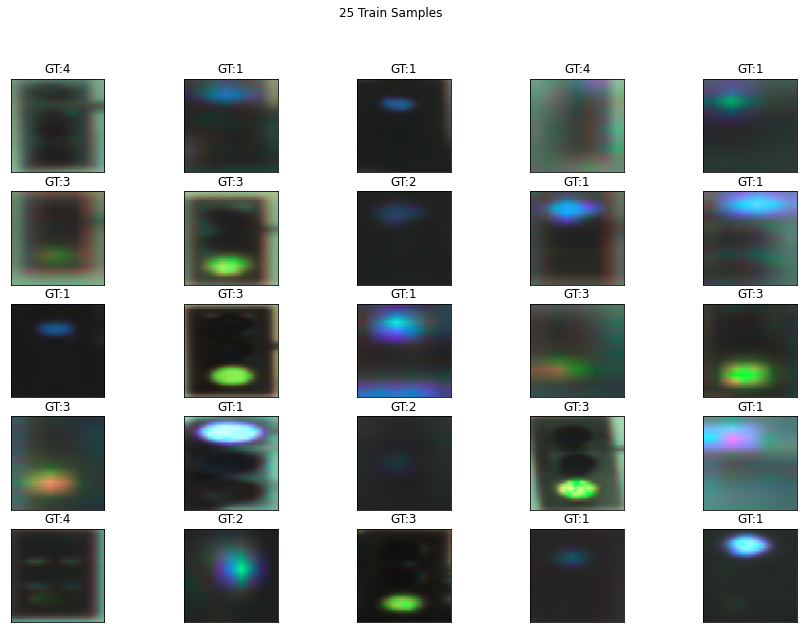

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
fig.suptitle('25 Train Samples')
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.title("GT:" + str(y_train[i]))
plt.show() 

In [7]:
# Flatten and print

xdev_flatten = X_train.reshape(9259, -1)
xtest_flatten = X_test.reshape(1030, -1)
print("Shape of xdev:",xdev_flatten.shape)
print("Shape of xtest:",xtest_flatten.shape)

Shape of xdev: (9259, 3072)
Shape of xtest: (1030, 3072)


In [8]:
# Standardize

xdev_flatten = xdev_flatten.astype('float32') / 255
xtest_flatten = xtest_flatten.astype('float32') / 255

In [9]:
print("Shape of xdev:",xdev_flatten.shape)
print("ydev values are :",y_train)
print("ytest values are :",y_test)

Shape of xdev: (9259, 3072)
ydev values are : ['4' '1' '1' ... '1' '1' '3']
ytest values are : ['4' '4' '2' ... '3' '1' '1']


In [10]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [11]:
print("ydev values are :",y_train)
print("ytest values are :",y_test)

ydev values are : [[0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]]
ytest values are : [[0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 ...
 [0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]]


In [12]:
# split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(xdev_flatten, y_train, test_size= 0.2, random_state=42)

In [13]:
print("X_train shape:",X_train.shape)
print("X_val shape:",X_val.shape)

X_train shape: (7407, 3072)
X_val shape: (1852, 3072)


In [14]:
batch_size = 128
pool_size = (2, 2)
input_shape = X_train.shape[1:]

In [15]:
print(input_shape)

(3072,)


In [16]:
model= Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 3072)             12288     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                        

In [18]:
# train

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model_metric = model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=50,
         validation_data=(X_val, y_val))

Epoch 1/50
116/116 [==============================] - 3s 15ms/step - loss: 1.9724 - accuracy: 0.3775 - val_loss: 1.2886 - val_accuracy: 0.5319
Epoch 2/50
116/116 [==============================] - 1s 12ms/step - loss: 1.3176 - accuracy: 0.5028 - val_loss: 1.2152 - val_accuracy: 0.5319
Epoch 3/50
116/116 [==============================] - 1s 12ms/step - loss: 1.2144 - accuracy: 0.5300 - val_loss: 1.1562 - val_accuracy: 0.5319
Epoch 4/50
116/116 [==============================] - 2s 18ms/step - loss: 1.1649 - accuracy: 0.5399 - val_loss: 1.1072 - val_accuracy: 0.5346
Epoch 5/50
116/116 [==============================] - 2s 18ms/step - loss: 1.1084 - accuracy: 0.5691 - val_loss: 0.9394 - val_accuracy: 0.7797
Epoch 6/50
116/116 [==============================] - 2s 16ms/step - loss: 1.0257 - accuracy: 0.6267 - val_loss: 0.7809 - val_accuracy: 0.8213
Epoch 7/50
116/116 [==============================] - 1s 13ms/step - loss: 0.9518 - accuracy: 0.6645 - val_loss: 0.6905 - val_accuracy: 0.8159

In [19]:
import pandas as pd
df = pd.DataFrame(model_metric.history)

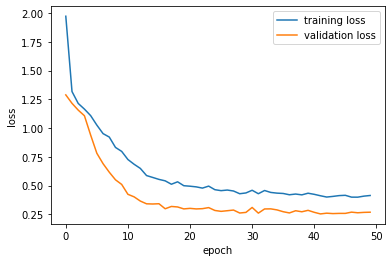

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots();
ax.plot(df.index, df['loss'], label='training loss');
ax.plot(df.index, df['val_loss'], label='validation loss');
ax.set_xlabel('epoch');
ax.set_ylabel('loss');
plt.legend()

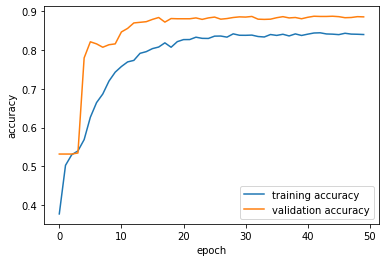

In [21]:
fig, ax = plt.subplots();
ax.plot(df.index, df['accuracy'], label='training accuracy');
ax.plot(df.index, df['val_accuracy'], label='validation accuracy');
ax.set_xlabel('epoch');
ax.set_ylabel('accuracy');
plt.legend()


In [22]:
# evaluate on test set
# evaluate
score = model.evaluate(xtest_flatten, y_test)
print("Accuracy on the trained model", score[1])
print('Loss on the trained model', score[0])

33/33 [==============================] - 0s 4ms/step - loss: 0.2936 - accuracy: 0.8602
Accuracy on the trained model 0.8601941466331482
Loss on the trained model 0.29359400272369385


In [23]:
model.save('drive/MyDrive/bosch/sign_model.h5')

In [24]:
predictions = model.predict(xtest_flatten)

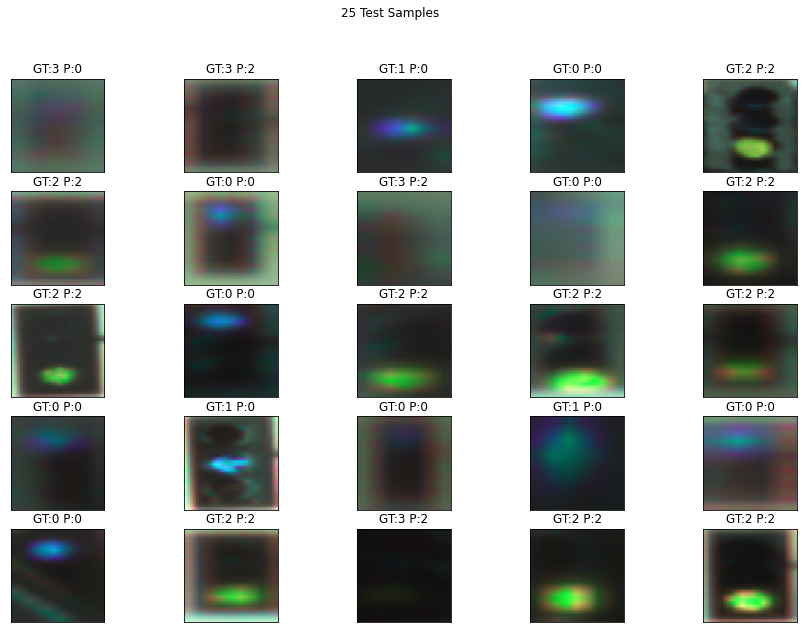

In [25]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('25 Test Samples')
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.title("GT:" + str(np.argmax(y_test[i])) +" P:" + str(np.argmax(predictions[i])))
plt.show() 